# UTKFace Efficientnet Training with Distance Weight

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, EfficientB3Model, ResNet50Model, VGG16Model
from distancetraining import ModelTrainer

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない

In [3]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

model_name = "efficientnet"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/efficientnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

In [4]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (200, 200)


Validation Accuracy: 0.4954 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.5735
Validation Accuracy: 0.4954 | Loss: 0.0004 | F1: 0.0000 | AUC: 0.6243
Validation Accuracy: 0.4983 | Loss: 0.0004 | F1: 0.0116 | AUC: 0.6949
Validation Accuracy: 0.5101 | Loss: 0.0004 | F1: 0.0596 | AUC: 0.7339
Validation Accuracy: 0.6338 | Loss: 0.0004 | F1: 0.4769 | AUC: 0.7821
Validation Accuracy: 0.7131 | Loss: 0.0004 | F1: 0.6813 | AUC: 0.7692
Validation Accuracy: 0.7328 | Loss: 0.0003 | F1: 0.6930 | AUC: 0.8149
Validation Accuracy: 0.7592 | Loss: 0.0003 | F1: 0.7318 | AUC: 0.8420
Validation Accuracy: 0.7534 | Loss: 0.0003 | F1: 0.7006 | AUC: 0.8481
Validation Accuracy: 0.7848 | Loss: 0.0002 | F1: 0.7532 | AUC: 0.8896
Validation Accuracy: 0.7798 | Loss: 0.0003 | F1: 0.7374 | AUC: 0.8909
Validation Accuracy: 0.8242 | Loss: 0.0002 | F1: 0.8075 | AUC: 0.9161
Validation Accuracy: 0.8284 | Loss: 0.0003 | F1: 0.8205 | AUC: 0.9067
Validation Accuracy: 0.7768 | Loss: 0.0003 | F1: 0.7226 | AUC: 0.9209
Validation Accuracy:

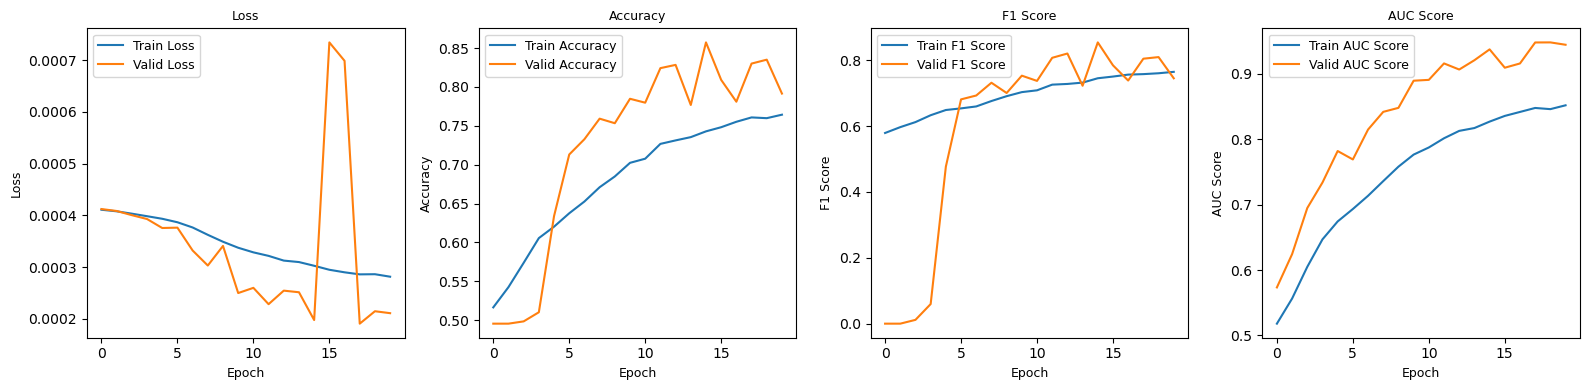

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB3Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [6]:
model = EfficientB3Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.81      0.92      0.87      1181
           1       0.91      0.79      0.85      1203

    accuracy                           0.86      2384
   macro avg       0.86      0.86      0.86      2384
weighted avg       0.86      0.86      0.86      2384

Skin tone 1: Accuracy 0.846286701208981
Skin tone 3: Accuracy 0.8996598639455783
Skin tone 0: Accuracy 0.8545454545454545
Skin tone 2: Accuracy 0.8316993464052288


In [7]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1171
           1       0.91      0.80      0.85      1177

    accuracy                           0.86      2348
   macro avg       0.87      0.86      0.86      2348
weighted avg       0.87      0.86      0.86      2348

Skin tone 1: Accuracy 0.8637992831541219
Skin tone 3: Accuracy 0.8852173913043478
Skin tone 2: Accuracy 0.8168316831683168
Skin tone 0: Accuracy 0.8752052545155994


# Resnet

In [8]:
model_name = "resnet"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/resnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.4954 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.6131
Validation Accuracy: 0.5034 | Loss: 0.0005 | F1: 0.0374 | AUC: 0.7719
Validation Accuracy: 0.7416 | Loss: 0.0004 | F1: 0.6857 | AUC: 0.8504
Validation Accuracy: 0.7299 | Loss: 0.0004 | F1: 0.6434 | AUC: 0.8894
Validation Accuracy: 0.7383 | Loss: 0.0003 | F1: 0.6598 | AUC: 0.9170
Validation Accuracy: 0.7559 | Loss: 0.0003 | F1: 0.6894 | AUC: 0.9136
Validation Accuracy: 0.8205 | Loss: 0.0003 | F1: 0.7964 | AUC: 0.9332
Validation Accuracy: 0.8209 | Loss: 0.0003 | F1: 0.7932 | AUC: 0.9398
Validation Accuracy: 0.8469 | Loss: 0.0003 | F1: 0.8361 | AUC: 0.9414
Validation Accuracy: 0.8335 | Loss: 0.0003 | F1: 0.8147 | AUC: 0.9407
Validation Accuracy: 0.8393 | Loss: 0.0003 | F1: 0.8216 | AUC: 0.9395
Validation Accuracy: 0.8687 | Loss: 0.0002 | F1: 0.8641 | AUC: 0.9423
Validation Accuracy: 0.8666 | Loss: 0.0003 | F1: 0.8659 | AUC: 0.9390
Validation Accuracy: 0.8674 | Loss: 0.0002 | F1: 0.8588 | AUC: 0.9552
Validation Accuracy:

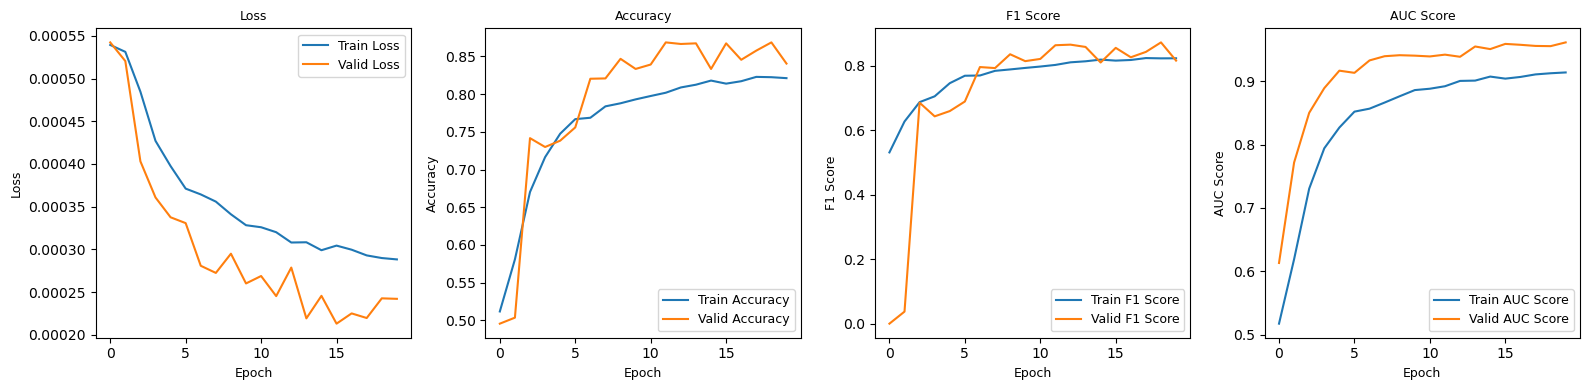

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [10]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1181
           1       0.92      0.84      0.88      1203

    accuracy                           0.88      2384
   macro avg       0.88      0.88      0.88      2384
weighted avg       0.88      0.88      0.88      2384

Skin tone 1: Accuracy 0.8929188255613126
Skin tone 3: Accuracy 0.9098639455782312
Skin tone 0: Accuracy 0.8760330578512396
Skin tone 2: Accuracy 0.8496732026143791


In [11]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1171
           1       0.92      0.85      0.88      1177

    accuracy                           0.89      2348
   macro avg       0.89      0.89      0.89      2348
weighted avg       0.89      0.89      0.89      2348

Skin tone 1: Accuracy 0.9229390681003584
Skin tone 3: Accuracy 0.9269565217391305
Skin tone 2: Accuracy 0.834983498349835
Skin tone 0: Accuracy 0.8653530377668309


# VGG

In [12]:
model_name = "vgg"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/vgg/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.7789 | Loss: 0.0006 | F1: 0.7969 | AUC: 0.8713
Validation Accuracy: 0.7278 | Loss: 0.0006 | F1: 0.7784 | AUC: 0.9122
Validation Accuracy: 0.8347 | Loss: 0.0004 | F1: 0.8176 | AUC: 0.9166
Validation Accuracy: 0.7806 | Loss: 0.0004 | F1: 0.7311 | AUC: 0.9176
Validation Accuracy: 0.7844 | Loss: 0.0004 | F1: 0.7348 | AUC: 0.9179
Validation Accuracy: 0.8276 | Loss: 0.0004 | F1: 0.8105 | AUC: 0.9117
Validation Accuracy: 0.7970 | Loss: 0.0005 | F1: 0.7960 | AUC: 0.8862
Validation Accuracy: 0.6619 | Loss: 0.0005 | F1: 0.5067 | AUC: 0.8957
Validation Accuracy: 0.6825 | Loss: 0.0005 | F1: 0.5612 | AUC: 0.8758
Validation Accuracy: 0.7517 | Loss: 0.0006 | F1: 0.7223 | AUC: 0.8424
Validation Accuracy: 0.6497 | Loss: 0.0006 | F1: 0.5143 | AUC: 0.7710
Validation Accuracy: 0.4954 | Loss: 0.0007 | F1: 0.0000 | AUC: 0.7404
Validation Accuracy: 0.4954 | Loss: 0.0007 | F1: 0.0000 | AUC: 0.7342
Validation Accuracy: 0.4954 | Loss: 0.0007 | F1: 0.0000 | AUC: 0.7344
Validation Accuracy:

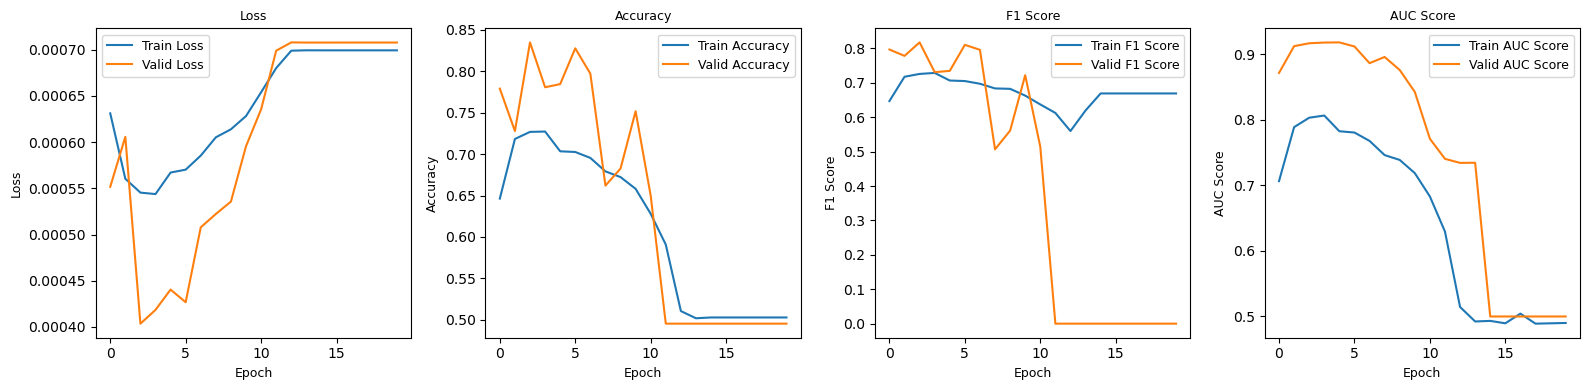

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [14]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1181
           1       0.85      0.83      0.84      1203

    accuracy                           0.84      2384
   macro avg       0.84      0.84      0.84      2384
weighted avg       0.84      0.84      0.84      2384

Skin tone 1: Accuracy 0.8255613126079447
Skin tone 3: Accuracy 0.8826530612244898
Skin tone 0: Accuracy 0.8380165289256198
Skin tone 2: Accuracy 0.803921568627451


In [15]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1171
           1       0.84      0.84      0.84      1177

    accuracy                           0.84      2348
   macro avg       0.84      0.84      0.84      2348
weighted avg       0.84      0.84      0.84      2348

Skin tone 1: Accuracy 0.8530465949820788
Skin tone 3: Accuracy 0.8695652173913043
Skin tone 2: Accuracy 0.7871287128712872
Skin tone 0: Accuracy 0.8620689655172413


/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
